# Scenario probability distribution



In [1]:
# import relevant packages
import yfinance as yf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Define the time period
start_date = "2006-01-01"
end_date = "2024-09-16"

# downloads the Adjusted Close prices for the VIX, S&P 500 ETF (SPY), and Aggregate Bond ETF (AGG
tickers = ["^VIX", "SPY", "AGG"]
df_data = yf.download(tickers, start=start_date, end=end_date)['Close']

C:\Users\johan\AppData\Local\Temp\ipykernel_27716\3378149067.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


In [3]:
df_data.head()

Ticker,AGG,SPY,^VIX
Date,,,
2006-01-03,54.533821,87.964951,11.14
2006-01-04,54.663872,88.381508,11.37
2006-01-05,54.663872,88.437027,11.31
2006-01-06,54.539257,89.172966,11.00
2006-01-09,54.598846,89.402077,11.13


## Problem 1

Calculate the log-returns for the for S&P 500 ETF (SPY) and Aggregate Bond ETF (AGG) using the Adj. closing prices. 

### Solution

In [4]:
# get adj. closing prices for price index
price_data = df_data[["SPY", "AGG"]]

# replacing price data with log-returns
df_data[["SPY ret", "AGG ret"]] = np.log(price_data / price_data.shift(1))
df_data.dropna(inplace=True)

In [5]:
df_data.head()

Ticker,AGG,SPY,^VIX,SPY ret,AGG ret
Date,,,,,
2006-01-04,54.663872,88.381508,11.37,0.004724,0.002382
2006-01-05,54.663872,88.437027,11.31,0.000628,0.000000
2006-01-06,54.539257,89.172966,11.00,0.008287,-0.002282
2006-01-09,54.598846,89.402077,11.13,0.002566,0.001092
2006-01-10,54.490482,89.492310,10.86,0.001009,-0.001987


## Problem 2

Calculate the unconditional covariance and correlation matrix based on the full sample. 

### Solution

In [6]:
cov_mat  = df_data[['SPY ret', 'AGG ret']].cov()
corr_mat = df_data[['SPY ret', 'AGG ret']].corr()

In [7]:
corr_mat

Ticker,SPY ret,AGG ret
Ticker,,
SPY ret,1.000000,-0.013981
AGG ret,-0.013981,1.000000


## Problem 3

Calculate the covariance matrix using scenario probabilities 

$$
p_t \propto \left \{\begin{array}{ll} 1 & \text{if } VIX_t \geq 20 \\ 0 & \text{if } VIX_t < 20 \end{array} \right .
$$

Plot the probabilities over time. 

Use the below function to calculate the probabilities. 

In [8]:
from typing import Tuple 

def crisp_conditioning_probs(x: np.typing.ArrayLike, condition: Tuple = (-np.inf, np.inf)) -> np.ndarray:
    """
    Creates an array of crisp condition probabilities.

    Currently only works for one state variable.

    Parameters
    ----------
    x:
        Array for setting the shape of.
    condition:
        Tuple with lower and upper bound.
    axis:
        The axis to create the weights over. Default is 0.

    Returns
    -------
    ndarray
        Array of equal weights.
    """

    probs = (x >= condition[0]) & (x <= condition[1])
    probs = probs / np.sum(probs)

    return probs


### Solution

In [9]:
probabilities = crisp_conditioning_probs(df_data['^VIX'], (20, np.inf))
unconditional_probabilities = crisp_conditioning_probs(df_data['^VIX'], (-np.inf, np.inf))

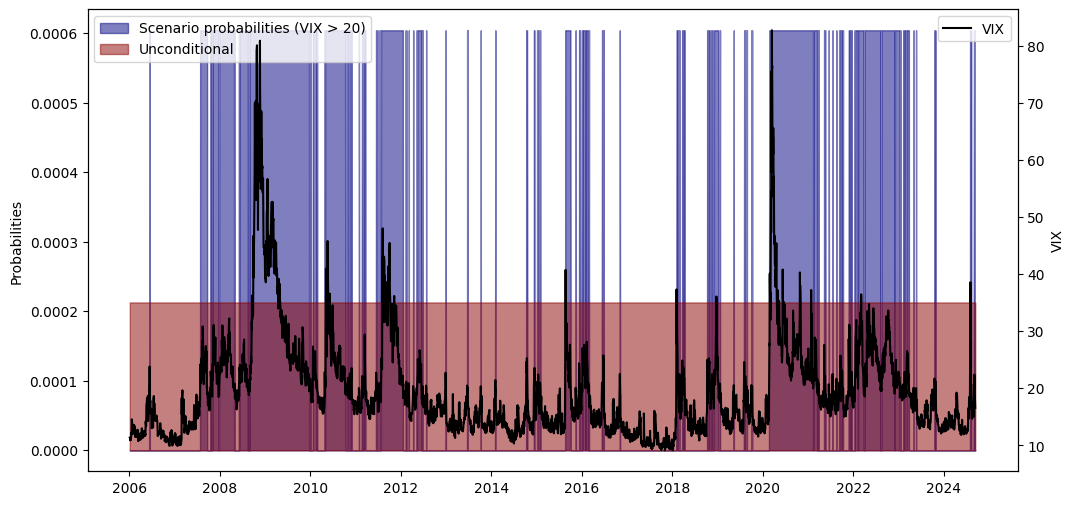

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.fill_between(probabilities.index, probabilities, label="Scenario probabilities (VIX > 20)", color="navy", alpha=0.5)
ax.fill_between(unconditional_probabilities.index, unconditional_probabilities, label="Unconditional", color="darkred", alpha=0.5)
ax.set_ylabel('Probabilities')

ax.legend(loc="upper left");

ax = ax.twinx()

ax.plot(df_data.index, df_data['^VIX'], label="VIX", color="black")
ax.set_ylabel('VIX');

ax.legend();

## Problem 4

Plot a histogram of the unconditional and conditional distribution of SPY log returns the `matplotlib` package.

### Solution

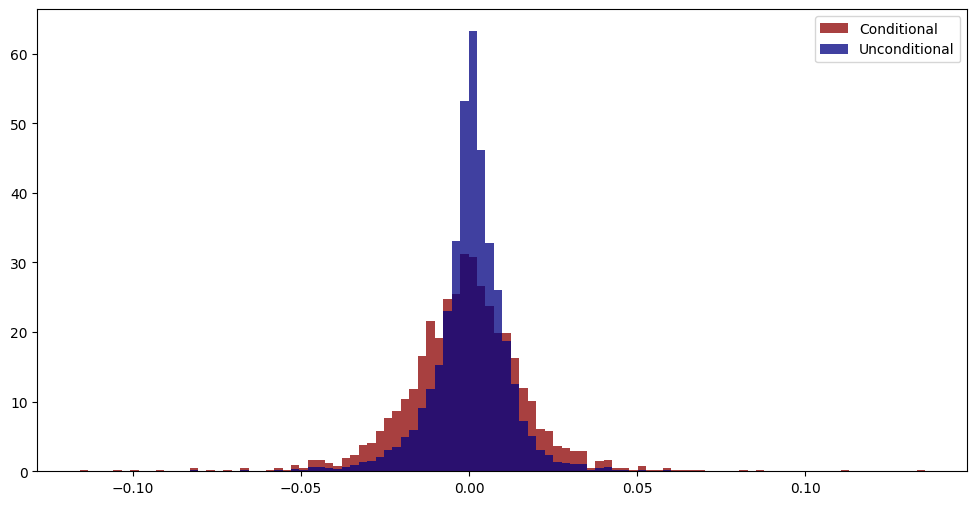

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_data['SPY ret'], color="darkred", label="Conditional", alpha=0.75, bins=100, weights=probabilities, density=True);
ax.hist(df_data['SPY ret'], color="navy", label="Unconditional", alpha=0.75, bins=100, density=True);

ax.legend()

## Problem 5

Calculate the conditional covariance and correlation matrix based on the full sample. You may want to use `numpy.cov` which has an argument `aweights` which together with `ddof=0` can we viewed as probabilities.  

### Solution

In [12]:
cond_cov_mat = np.cov(df_data[['SPY ret', 'AGG ret']], aweights=probabilities, rowvar=False, ddof=0)

In [13]:
cond_cov_mat

array([[ 3.42048027e-04, -4.42361014e-07],
       [-4.42361014e-07,  2.22030802e-05]])

In [14]:
vols = np.sqrt(np.diag(cond_cov_mat))
cond_corr_mat = cond_cov_mat * np.outer(1 / vols, 1 / vols)

In [15]:
cond_corr_mat.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [20]:
"""
Alternative
"""

import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

import codelib.statistics.moments as mom

mom.calculate_correlation(df_data['AGG ret'], df_data['SPY ret'], probs=probabilities.values)

np.float64(-0.005078358120698461)